TODOs:
* add docstrings

To try ?: 
* use MAE loss
* polynomial expansion 

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# TODO where should I put this function?
def accuracy(y, tx, w):
    N = len(y)
    predictions =  np.sign(tx@w)
    nb_errors = np.sum(np.absolute(y - predictions)/2)
    
    return (N-nb_errors)/N

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

In [4]:
from implementations import *

### Gradient Descent

**!!! TODO remove**

**Tried so far (max_iters, gamma, train acc, test acc):**
* (50,  1e-7, 0.647, 0.258)
* (100, 1e-7, 0.666, 0.210)
* (300, 1e-7, 0.691, 0.112)


* (100, 1e-8, 0.640, 0.274)
* (200, 1e-8, 0.641, 0.273)


* (50,  1e-10, 0.639, 0.277)
* (100, 1e-10, 0.639, 0.277)
* (500, 1e-10, 0.639, 0.277)
* (1000, 1e-10, 0.639, 0.277)

note: if gamma >= 1e-6, it diverges


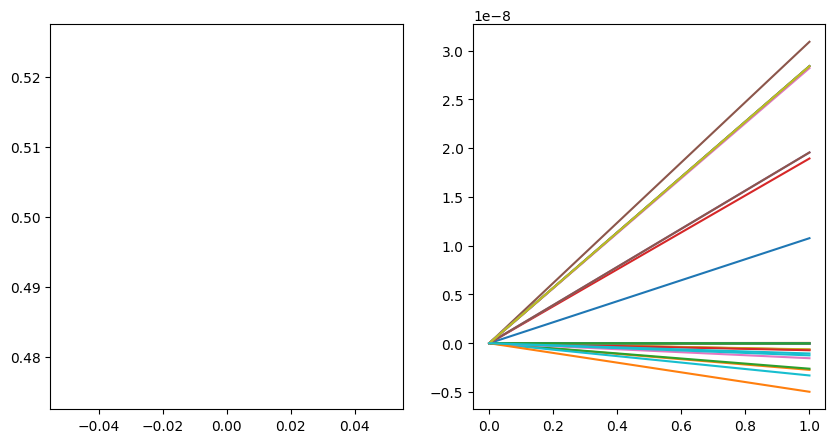

In [5]:
max_iters = 1
gamma = 1e-10

initial_w = np.zeros((tX.shape[1]))

weights, loss, ws, losses = least_squares_GD_complete(y, tX, initial_w, max_iters, gamma)
# display
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(10,5))
ax0 = ax0.plot(losses)
ax1 = ax1.plot(ws)

In [6]:
loss

0.4999292742099204

In [7]:
accuracy(y, tX, weights )

0.638912

### SGD

**!!! TODO remove**

**Tried so far (max_iters, gamma, train acc, test acc):**
* (100, 1e-7, 0.686, 0.103)
* (1000, 1e-7, 0.461, 0.793)

note: if gamma >= 1e-6, it diverges

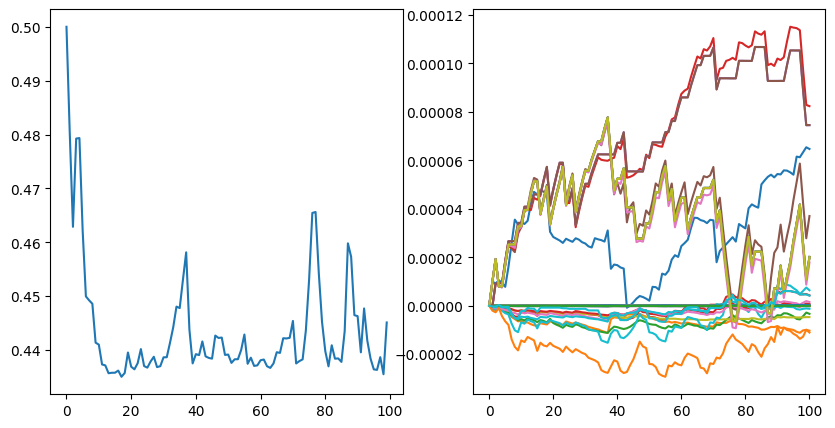

In [8]:
max_iters = 100
gamma = 1e-8

initial_w = np.zeros((tX.shape[1]))

#weights, loss, ws, losses = least_squares_SGD_complete(y, tX, initial_w, max_iters, gamma)
weights, loss, ws, losses = least_squares_SGD2_complete(y, tX, initial_w, max_iters, gamma)

# display
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0] = axes[0].plot(losses)
axes[1] = axes[1].plot(ws)
#axes[1,0] = axes[1,0].plot(losses2)
#axes[1,1] = axes[1,1].plot(ws2)

In [9]:
loss

0.4384928813750217

In [10]:
accuracy(y, tX, weights)

0.640204

### Least Squares

In [11]:
weights, loss = least_squares(y, tX)
loss

0.3396868094770933

In [12]:
accuracy(y, tX, weights)

0.744328

### Ridge Regression

**!!! TODO remove**

**Tried so far (lambda, train acc, test acc):**
* (2, 0.733, 0.233)
* (1, 0.734, 0.234)
* (1e-1, 0.738, 0.244)
* (1e-6, 0.744, 0.251)
* (1e-7, 0.744, 0.251)
* (1e-8, 0.744, 0.251)

In [47]:
lambda_ = 2
weights, loss = ridge_regression(y, tX, lambda_)

In [48]:
accuracy(y, tX, weights)

0.733472

## Generate predictions and save ouput in csv format for submission:

In [42]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_error, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [49]:
# TODO remove
accuracy(y_error, tX_test, weights)

0.23166525293978932

In [26]:
OUTPUT_PATH = '../data/test_sub.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)